## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv("./data/QueryResults.csv", header=0, names=['DATE', 'TAG', 'POSTS'])  # Specify Column Names

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
print('df.info() = ')
df.info()  # Returns nothing so cannot print
print()
print(f'df.columns = {df.columns}\n')
row, col = df.shape 
print(f'Number of rows (len(df)) = {len(df)}')
print(f'Number of rows (df.shape[0]) = {df.shape[0]}')
print(f'Number of rows (row) = {row}\n')
print(f'Number of columns (len(df.columns)) =  {len(df.columns)}')
print(f'Number of columns (df.shape[1]) =  {df.shape[1]}')
print(f'Number of columns (col) = {col}\n')
print(f'df.size = {df.size} = {row} * {col}')

df.info() = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    1991 non-null   object
 1   TAG     1991 non-null   object
 2   POSTS   1991 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 46.8+ KB

df.columns = Index(['DATE', 'TAG', 'POSTS'], dtype='object')

Number of rows (len(df)) = 1991
Number of rows (df.shape[0]) = 1991
Number of rows (row) = 1991

Number of columns (len(df.columns)) =  3
Number of columns (df.shape[1]) =  3
Number of columns (col) = 3

df.size = 5973 = 1991 * 3


**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [7]:
# There is one entry per month for each language, so just count the number of entries
df[['TAG', 'POSTS']].groupby('TAG').count()  # Use a list inside the selection brackets to select multiple columns

,POSTS
TAG,
assembly,144
c,144
c#,145
c++,144
delphi,144
go,129
java,144
javascript,144
perl,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
df['DATE'][1]  # Get the first item in the DATE column (pandas Series)

'2008-08-01 00:00:00'

In [9]:
df['DATE'] = pd.to_datetime(df['DATE'])  
# Note: for column names with no spaces, we could also use df.DATE to select the DATE column

In [10]:
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182


## Data Manipulation



In [11]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [12]:
reshaped_df.shape

(145, 14)

In [13]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [14]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [15]:
# Check for NaN
reshaped_df.isna().values.any()

True

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [16]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [17]:
# Replace NaN with zero
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


Here we are using the .isna() method that we've used before, but we're chaining two more things: the values attribute and the any() method. This means we don't have to search through the entire DataFrame to spot if .isna() is True.

In [18]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

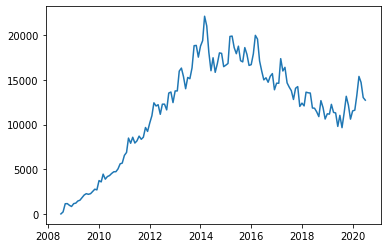

In [19]:
# plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df['java'])

**Challenge**: Show two lines (e.g. for Java and Python) on the same chart.

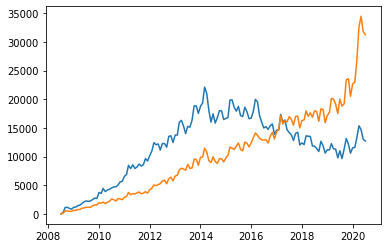

In [20]:
# plt.plot(reshaped_df['java'])
# plt.plot(reshaped_df['python'])
plt.plot(reshaped_df[['java', 'python']])

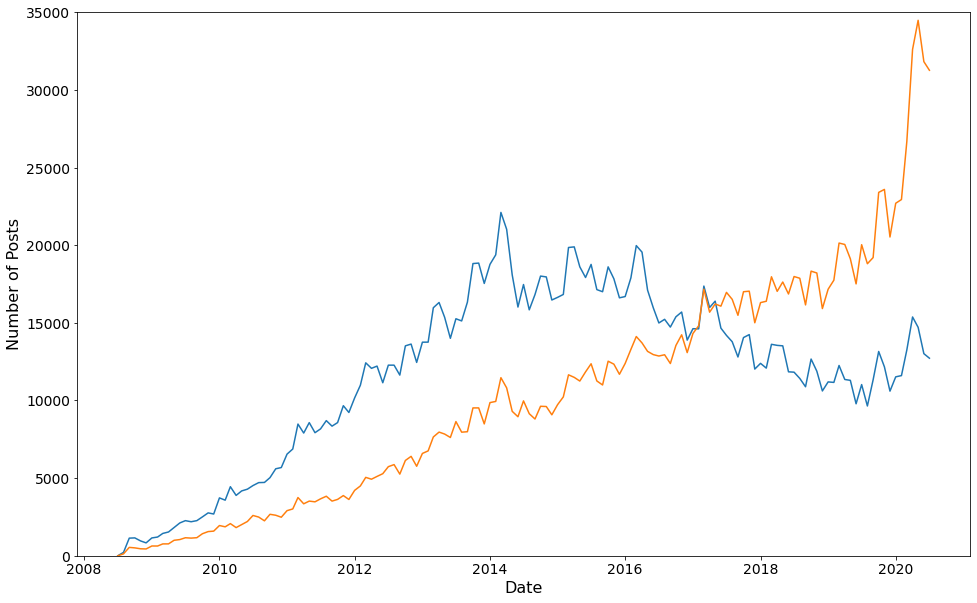

In [21]:
plt.figure(figsize=(16, 10))  # {width,height} in inches

# matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)
#   ticks: array-like - The list of xtick locations. Passing an empty list removes all xticks.
#   labels: array-like - The labels to place at the given ticks locations. This argument can only be passed if ticks is passed as well.
#   xticks **kwargs: Text properties can be used to control the appearance of the labels.
#     fontsize: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
#     If float, the fontsize in points. The string values denote sizes relative to the default font size.

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Posts', fontsize=16)
plt.ylim(0, 35000)

# plt.plot(reshaped_df.index, reshaped_df['java'])
# plt.plot(reshaped_df['java'])
# plt.plot(reshaped_df['python'])
plt.plot(reshaped_df[['java', 'python']])

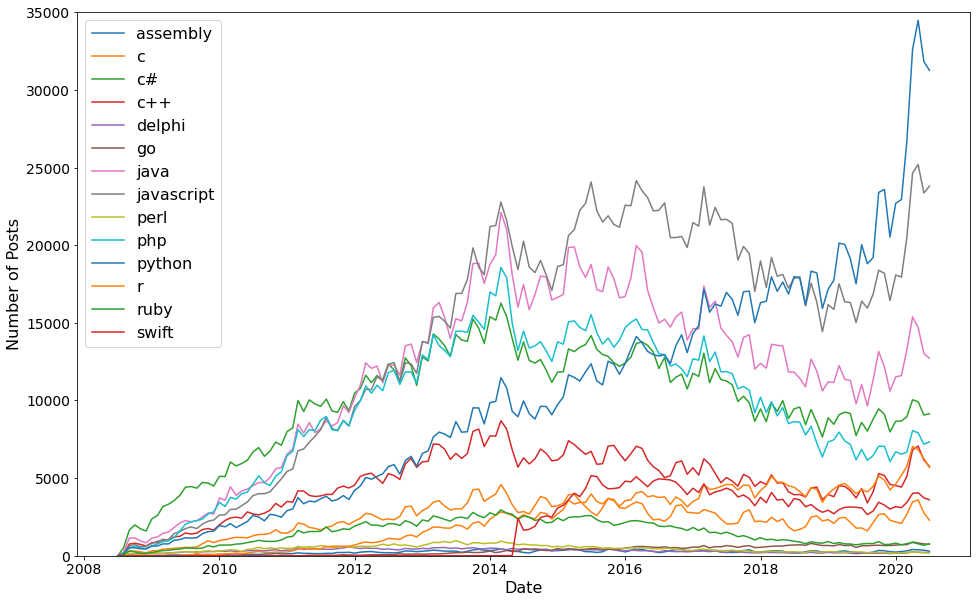

In [22]:
plt.figure(figsize=(16, 10))  # {width,height} in inches
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Posts', fontsize=16)
plt.ylim(0, 35000)

# for column in reshaped_df.columns:
#     plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
# plt.legend(fontsize=16)
plt.plot(reshaped_df.index, reshaped_df)
plt.legend(fontsize=16, labels=reshaped_df.columns)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [23]:
# DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)
# window: int, offset, or BaseIndexer subclass
#   int: Size of the moving window. This is the number of observations used for calculating the statistic.
#     Each window will be a fixed size.
# min_periods will default to the size of the window.

roll_df = reshaped_df.rolling(window=6)  # Rolling [window=6,center=False,axis=0]
roll_df

Rolling [window=6,center=False,axis=0]

In [24]:
roll_df = reshaped_df.rolling(window=6).mean()
roll_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,296.000000,2431.000000,8807.000000,4851.166667,168.666667,687.000000,12050.000000,18252.000000,200.833333,6681.166667,23304.000000,4969.333333,780.000000,3238.000000
2020-04-01,305.500000,2567.000000,8903.500000,5105.333333,183.333333,721.666667,12420.166667,19293.333333,204.833333,6848.333333,24838.500000,5288.000000,771.166667,3332.166667
2020-05-01,316.000000,2716.833333,9040.166667,5421.500000,190.166667,749.500000,12844.500000,20461.500000,203.666667,6993.333333,26653.166667,5614.166667,779.166667,3465.666667


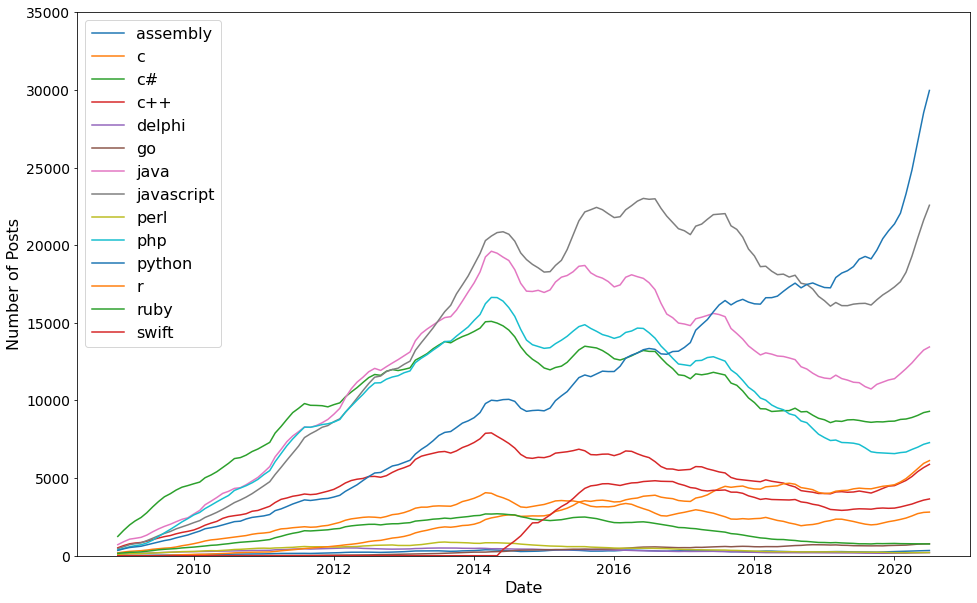

In [25]:
plt.figure(figsize=(16, 10))  # {width,height} in inches
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Posts', fontsize=16)
plt.ylim(0, 35000)

plt.plot(roll_df.index, roll_df)
plt.legend(fontsize=16, labels=roll_df.columns)

# Quiz

## Question 1:

Looking at the data, what was the most popular programming language from 2008 to 2012 by the number of posts?
<br>
Python, Javascript, Assembly, C#

In [26]:
pd.set_option('display.max_rows', None)  # Forces display of all dataframe rows
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
2008-12-01,18.0,186.0,1597.0,633.0,134.0,0.0,832.0,627.0,134.0,481.0,441.0,1.0,161.0,0.0
2009-01-01,22.0,321.0,2378.0,853.0,164.0,0.0,1150.0,792.0,147.0,636.0,631.0,8.0,209.0,1.0
2009-02-01,37.0,332.0,2599.0,845.0,168.0,0.0,1208.0,948.0,165.0,769.0,630.0,9.0,287.0,1.0
2009-03-01,24.0,430.0,3162.0,1056.0,162.0,0.0,1440.0,1005.0,139.0,904.0,765.0,4.0,330.0,1.0


In [27]:
slice_df = reshaped_df.loc[:'2012-12-01']
slice_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
2008-12-01,18.0,186.0,1597.0,633.0,134.0,0.0,832.0,627.0,134.0,481.0,441.0,1.0,161.0,0.0
2009-01-01,22.0,321.0,2378.0,853.0,164.0,0.0,1150.0,792.0,147.0,636.0,631.0,8.0,209.0,1.0
2009-02-01,37.0,332.0,2599.0,845.0,168.0,0.0,1208.0,948.0,165.0,769.0,630.0,9.0,287.0,1.0
2009-03-01,24.0,430.0,3162.0,1056.0,162.0,0.0,1440.0,1005.0,139.0,904.0,765.0,4.0,330.0,1.0


In [28]:
q1_list = ['Python', 'Javascript', 'Assembly', 'C#']
q1_dict = {lang: slice_df[lang.lower()].sum() for lang in q1_list}
q1_dict

{'Python': 148417.0,
 'Javascript': 291184.0,
 'Assembly': 6899.0,
 'C#': 380295.0}

In [29]:
lang, posts = {"", 0}
for (key, value) in q1_dict.items():
    if value > posts:
        lang = key
        posts = value
print(f'The most popular programming language from 2008 to 2012 is {lang} with {int(posts)} posts.')

The most popular programming language from 2008 to 2012 is C# with 380295 posts.


## Question 2:

What was the most popular programming language from 2015 to 2018?
<br>
Python, Java, Javascript, PHP

In [30]:
q2_list = ['Python', 'Java', 'Javascript', 'PHP']
slice_df = reshaped_df.loc['2015-01-01':'2018-12-01']
q2_dict = {lang: slice_df[lang.lower()].sum() for lang in q2_list}
lang, posts = {"", 0}
for (key, value) in q2_dict.items():
    if value > posts:
        lang = key
        posts = value
print(f'The most popular programming language from 2015 to 2018 is {lang} with {int(posts)} posts.')

The most popular programming language from 2015 to 2018 is Javascript with 979868 posts.


## Question 3:

What was the most popular programming language in 2020?
<br>
Javascript, PYTHON !!!!!!, Not Python

In [31]:
q3_list = reshaped_df.columns
slice_df = reshaped_df.loc['2020-01-01':'2020-12-01']
q3_dict = {lang: slice_df[lang.lower()].sum() for lang in q3_list}
lang, posts = {"", 0}
for (key, value) in q3_dict.items():
    if value > posts:
        lang = key
        posts = value
print(f'The most popular programming language in 2020 is {lang} with {int(posts)} posts.')

The most popular programming language in 2020 is python with 202471 posts.
